## Data Exploration and Visualization

In [6]:
import pandas as pd
import numpy as np
store = pd.read_csv('/home/cbnits/Downloads/Dataset/store.csv')
train = pd.read_csv('/home/cbnits/Downloads/Dataset/train.csv')

import warnings
warnings.filterwarnings("ignore")
training_data = train.sample(frac=0.7, random_state=25)
test = train.drop(training_data.index , index=None , axis=0)
train = train. reset_index(drop=True)
test.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
10,11,5,2015-07-31,10457,1236,1,1,0,1
15,16,5,2015-07-31,10231,979,1,1,0,1
16,17,5,2015-07-31,8430,946,1,1,0,1


In [7]:
print ("Lets look at training set-")
print (train.head(6))
print ("Lets look at stores data-")
print (train.head(6))
print ("Given number of rows for training =", train.shape[0])
print ("Given number of rows for testing =", test.shape[0])

Lets look at training set-
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   
5      6          5  2015-07-31   5651        589     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
Lets look at stores data-
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  20

In [8]:
sf = pd.merge(train, store, on='Store') #merge data for analysis
print ("List of columns -", sf.columns)
sf['Open'] = sf['Open'].apply(lambda x: 0 if np.isnan(x) else x) #get rid of NaN values if store is 'closed'

List of columns - Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:label='e99f2720-7184-479b-a9f9-f3fc251b1123'>

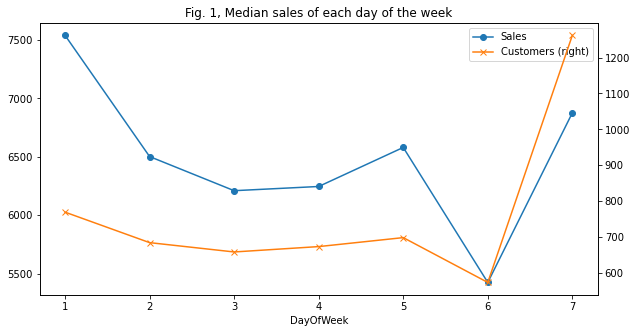

In [7]:
#a better way to get more details, timeline view of medians of each day of the week-
day = sf[(sf['Open']!=0)]
sales_day = day.groupby('DayOfWeek')['Sales'].median()
cust_day = day.groupby('DayOfWeek')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Fig. 1, Median sales of each day of the week")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

In [8]:
#for more insights lets split Year-Month-Date to three different columns
def date_change(data):
    data['Month'] = data['Date'].apply(lambda x : int(str(x)[5:7]))
    data['Year'] = data['Date'].apply(lambda x : int(str(x)[:4]))
    data['MonthYear'] = data['Date'].apply(lambda x : (str(x)[:7]))
    data['date_int'] = data['Date'].apply(lambda x : (str(x)[8:10]))
    data = data.drop('Date', axis=1)
    return data
sf = date_change(sf)
test = date_change(test)

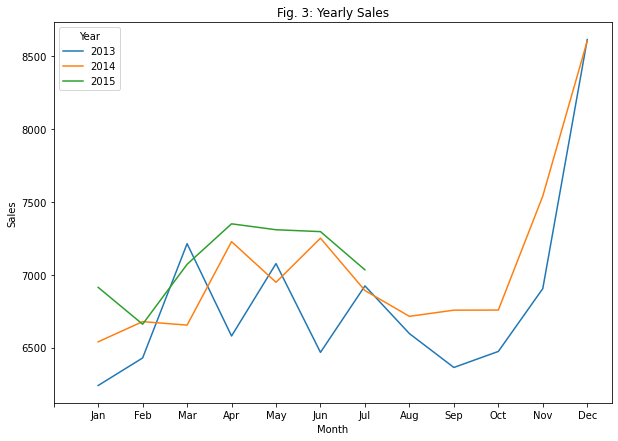

In [9]:
import calendar
# select all stores that were open
subs = sf[sf['Open']!=0]
# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].mean()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].mean()
# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Fig. 3: Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

<AxesSubplot:label='34d31b4e-8432-4b80-92ee-05bd3eb09aea'>

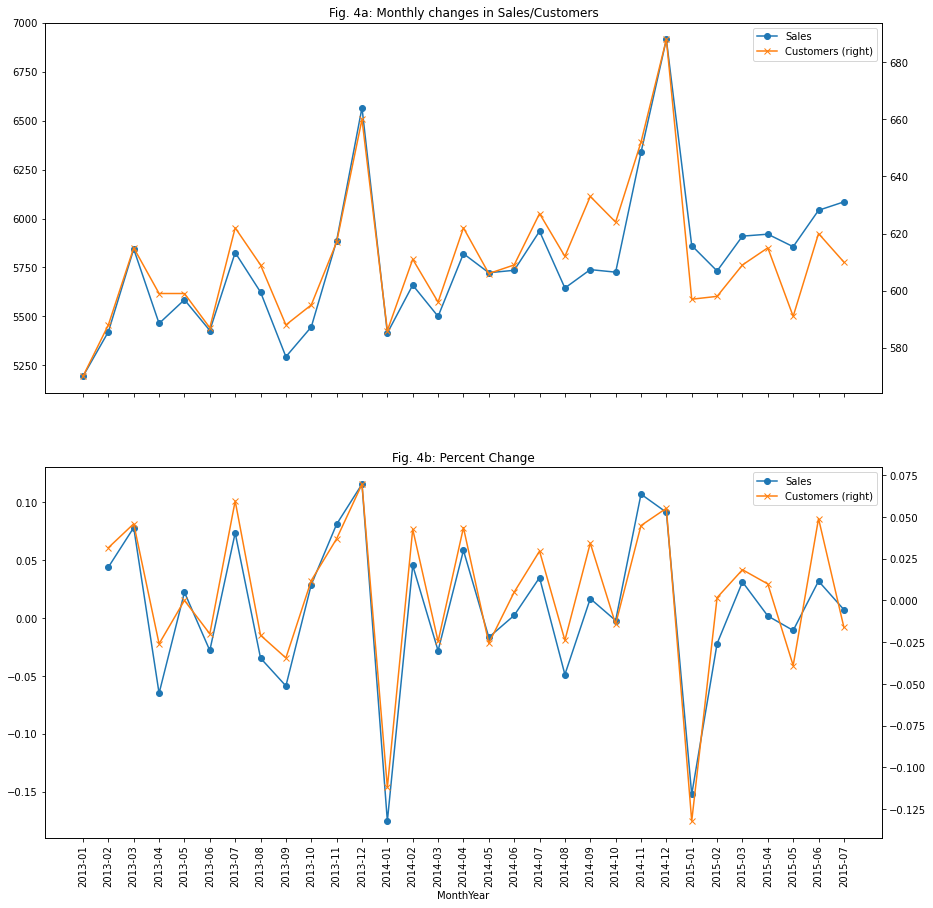

In [10]:
# median sales
median_sales = sf.groupby('MonthYear')['Sales'].median()
pct_median_change = sf.groupby('MonthYear')['Sales'].median().pct_change()
# median customers
median_cust = sf.groupby('MonthYear')['Customers'].median()
pct_median_custchange = sf.groupby('MonthYear')['Customers'].median().pct_change()

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,15))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Fig. 4a: Monthly changes in Sales/Customers")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
# plot pct change
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Fig. 4b: Percent Change")
# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

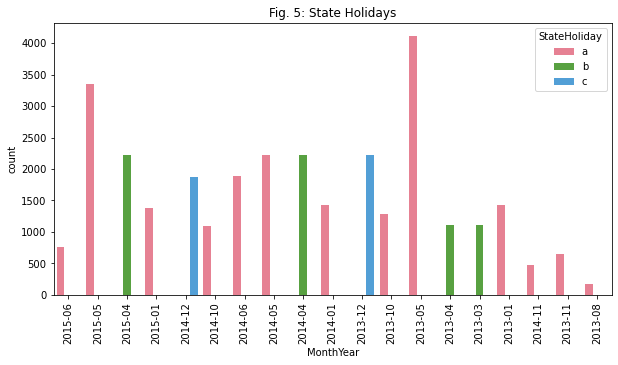

In [15]:
fig, (axis3) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# stateholiday overlay
# StateHoliday has a mixture of "O", 0 and "0", replace these with "O"
sf.StateHoliday.replace(["O",0,"0"],['O','O','O'], inplace=True)
ax3 = sns.countplot(x='MonthYear', hue='StateHoliday', data=sf[sf['StateHoliday']!='O'], palette='husl', ax=axis3)
tmp = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
tmp = ax3.set_title('Fig. 5: State Holidays')


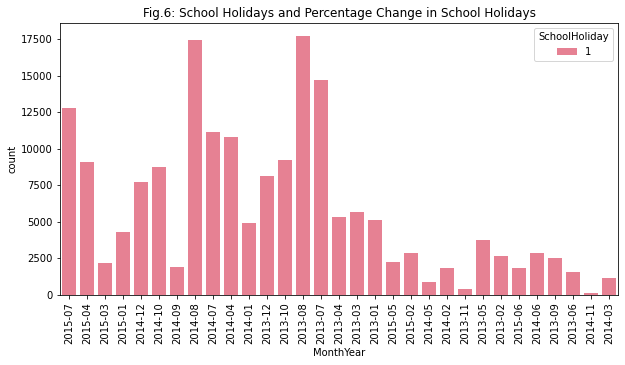

In [16]:
fig, (axis4) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax4 = sns.countplot(x='MonthYear', hue='SchoolHoliday', data=sf[sf['SchoolHoliday']!=0], palette='husl', ax=axis4)
subs = sf[sf['SchoolHoliday']!=0]
#cntchange = subs.groupby('MonthYear')['SchoolHoliday'].count().pct_change()
#cntchange.plot(ax=axis4, marker='x', secondary_y=True)
tmp = ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
tmp = ax4.set_title('Fig.6: School Holidays and Percentage Change in School Holidays')


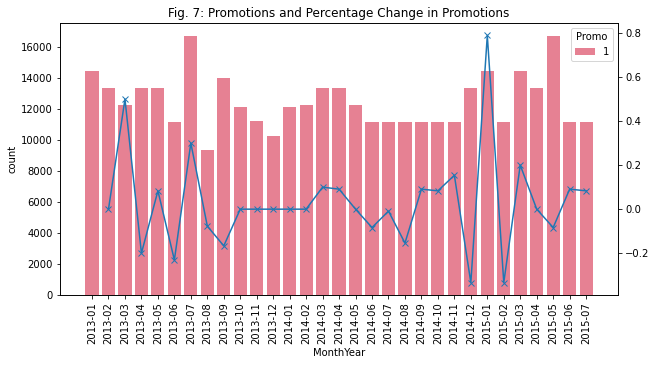

In [17]:
fig, (axis5) = plt.subplots(1,1, sharex=True, figsize=(10,5))
#promotions overlay
ax5 = sns.countplot(x='MonthYear', hue='Promo', data=sf[sf["Promo"]!=0], palette='husl', ax=axis5)
subs = sf[sf['Promo']!=0]
cntchange = subs.groupby('MonthYear')['Promo'].count().pct_change()
cntchange.plot(ax=axis5, marker='x', secondary_y=True)
tmp = ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
tmp = ax5.set_title('Fig. 7: Promotions and Percentage Change in Promotions')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

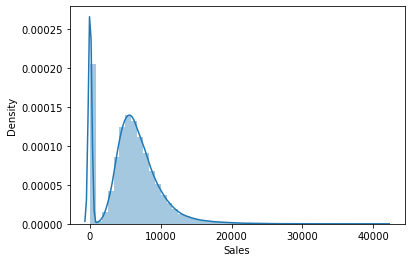

In [18]:
sns.distplot(sf['Sales'].dropna())

<AxesSubplot:xlabel='Sales'>

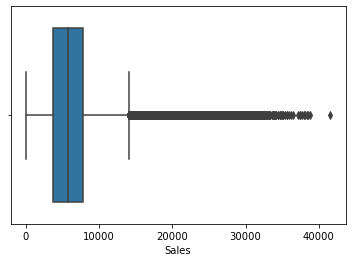

In [19]:
sns.boxplot(sf['Sales'])

## Removing outliers after 99th percentile

In [20]:
# Finding upper and lower limit
upper_limit = sf['Sales'].quantile(0.99)
lower_limit = sf['Sales'].quantile(0.01)
print("upper_limit : ",upper_limit)
print("lower_limit : ",lower_limit)

upper_limit :  17160.0
lower_limit :  0.0


<AxesSubplot:xlabel='Sales', ylabel='Density'>

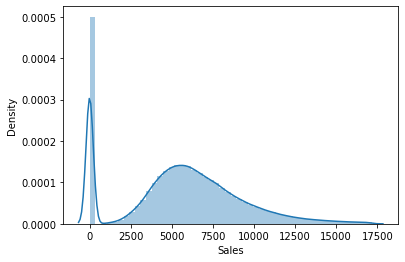

In [21]:
new_sf = sf[(sf['Sales'] <= 17160.0) & (sf['Sales'] >= 0.0)]
sns.distplot(new_sf['Sales'])

<AxesSubplot:xlabel='Sales'>

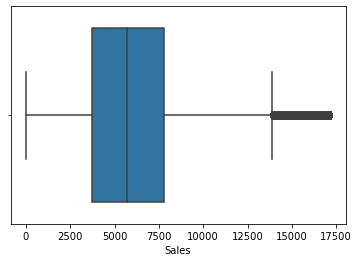

In [22]:
sns.boxplot(new_sf['Sales'])

## Standardization of Dataset

In [20]:
# Standardize time series data
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = sf.values
# values = sf.values.reshape(21361389, 1)
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

(1017209, 21)


## Check if data is stationary or non-stationary

<Figure size 432x432 with 0 Axes>

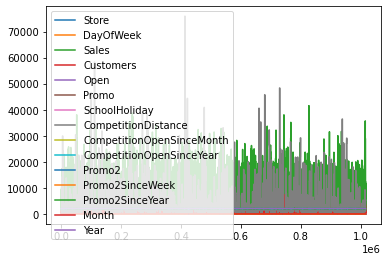

In [34]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(6, 6))
sf.plot()
pyplot.show()

Checks for Stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

1. Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.

2. Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.

3. Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

### 1. Look at Plots

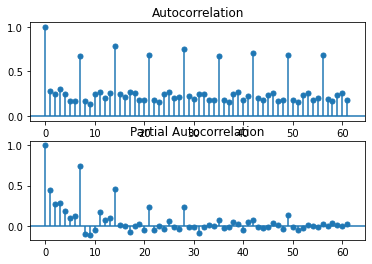

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
fig, ax = plt.subplots(2)
plot_acf(sf['Sales'], ax=ax[0])
plot_pacf(sf['Customers'], ax=ax[1]);

Data is stationary as they do not have trend or seasonal effects.

### 2. Summary Stats

In [52]:
X = sf['Sales'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5801.525100, mean2=5746.112899
variance1=14744172.399597, variance2=14898126.160203


### Augmented fuller test

In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = sf['Sales'].values
# X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  -4.808291
p-value:  5.2e-05
	5%: -2.870
	1%: -3.449
	10%: -2.571


Data seems to be stationary.

## Johansen Co-Integration Test

In [12]:
# following code gives eigen value
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(train,-1,1).eig

array([0.09947583, 0.00235395])


In [14]:
# following code gives critical values for trace statistic
coint_johansen(train_model_mul,-1,1).cvt

array([[10.4741, 12.3212, 16.364 ],[ 2.9762,  4.1296,  6.9406]])


In [15]:
# following code gives trace statistic values.
coint_johansen(train_model_mul,-1,1).lr1

array([83.2438963 ,  1.83117555])


## VAR Model

In [34]:
sf.index = sf.qtr
sf.index.freq = sf.index.inferred_freq
train = sf.loc['2016-05-01':'2019-10-01'] 
test = sf.loc['2015-01-01':]

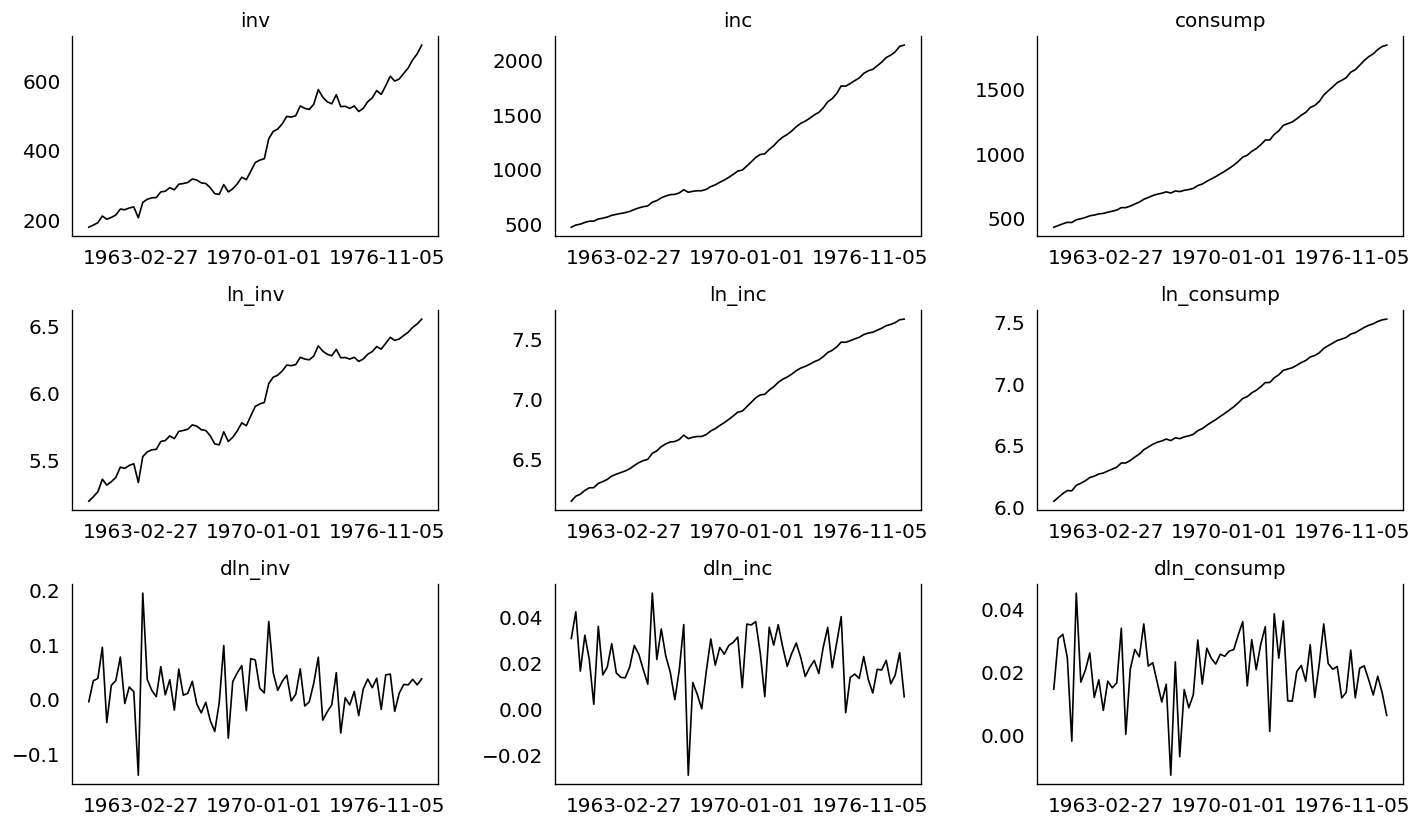

In [23]:
# Plot
df=train[ls]
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(12,7))
for i, ax in enumerate(axes.flatten()):
        ax.plot(df[df.columns[i]], color='black', linewidth=1)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=12)

plt.tight_layout();

## VAR Model

In [25]:
exog = train['dln_consump']
mod = sm.tsa.VARMAX(train[['dln_inv', 'dln_inc']], order=(1,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                             VAR(1)   Log Likelihood                 333.024
Date:                    Tue, 15 Mar 2022   AIC                           -652.049
Time:                            17:47:21   BIC                           -635.826
Sample:                        04-01-1960   HQIC                          -645.571
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.48, 15.99   Jarque-Bera (JB):         12.21, 13.05
Prob(Q):                        0.49, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.39, 0.65   Skew:                      0.14, -0.46
Prob(H) (two-sided):            0.02, 0.30   Kurtosis:                   4.96, 4.83


In [26]:
start_index = test.index.min()
end_index = test.index.max()
predictions = mod.fit().predict(start=start_index, end=end_index)

for i in range(predictions.shape[0]):
    if i==0:
        predictions.loc[predictions.index=='2016-01-01','lag_ln_inv']=train.iloc[74,4]
        predictions.loc[predictions.index=='2016-01-01','lag_ln_inc']=train.iloc[74,6]
    else:
        predictions.iloc[i,2]=predictions.iloc[i-1,4]
        predictions.iloc[i,3]=predictions.iloc[i-1,5]

    predictions['ln_inv']=(predictions['lag_ln_inv']+predictions['dln_inv'])
    predictions['ln_inc']=(predictions['lag_ln_inc']+predictions['dln_inc'])


    predictions['inv']=np.exp(predictions['ln_inv'])
    predictions['inc']=np.exp(predictions['ln_inc'])

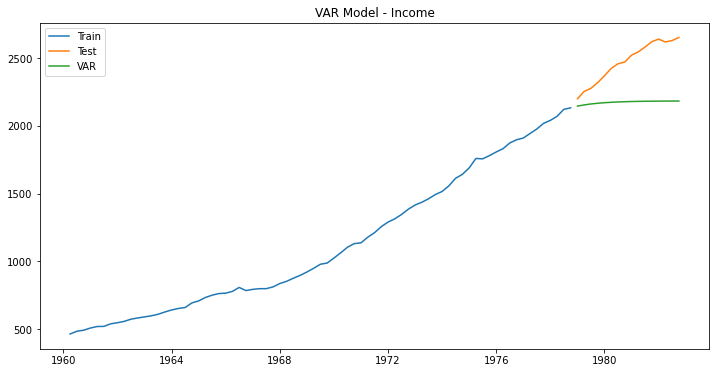

In [27]:
plt.figure(figsize=(12,6)) 
plt.plot( train['inc'], label='Train')
plt.plot(test['inc'], label='Test')
plt.plot(predictions['inc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

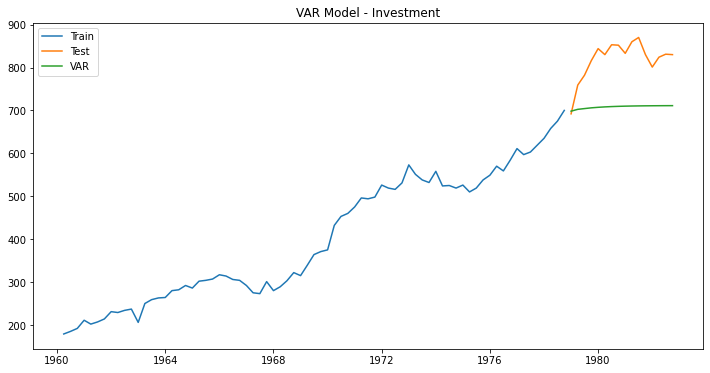

In [28]:
plt.figure(figsize=(12,6))
plt.plot(train['inv'], label='Train')
plt.plot(test['inv'], label='Test')
plt.plot(predictions['inv'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

In [29]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.inc, predictions.inc)).round(2)
#print('Income: RMSE:',  rmse)

model_comparison=pd.DataFrame()
model_comparison.loc[0,'Model']='VAR'
model_comparison.loc[0,'Variable']='Sales'
model_comparison.loc[0,'RMSE']=rmse

rmse = np.sqrt(mean_squared_error(test.inv, predictions.inv)).round(2)
#print('Investment: RMSE:',  rmse)

append=pd.DataFrame()
append.loc[0,'Model']='VAR'
append.loc[0,'Variable']='Investment'
append.loc[0,'RMSE']=rmse

model_comparison = model_comparison.append(append)

# Mean Absolute Percentage Error
abs_error = np.abs(test.inc-predictions.inc)
actual = test.inc
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Income: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Income', 'MAPE'] = mape

abs_error = np.abs(test.inv-predictions.inv)
actual = test.inv
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Investment: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Investment', 'MAPE'] = mape

In [30]:
model_comparison.reset_index(drop=True, inplace=True)
model_comparison

,Model,Variable,RMSE,MAPE
0,VAR,Income,329.41,11.83
1,VAR,Investment,117.97,13.43


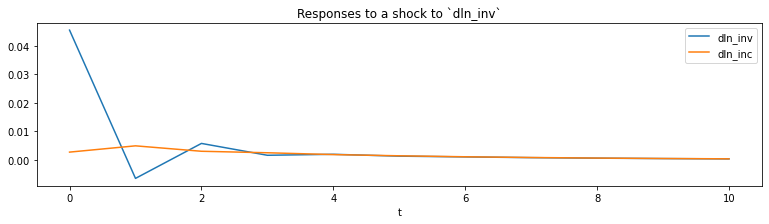

In [33]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');